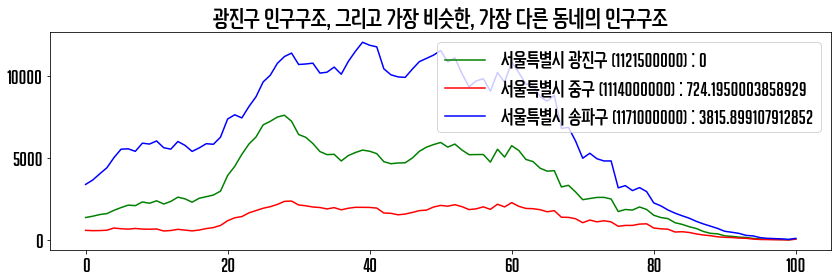

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import csv

f = open('202105_202105_연령별인구현황_월간.csv', 'r', encoding='cp949')

data = csv.reader(f)
next(data)
next(data)

listed_data = list(data)

result = []
result_after_subtraction = []
result_std = []

for i in range(0,len(listed_data)):
    result.append([])
    listed_data_row = listed_data[i]
    result[i] = listed_data_row[3:104]
    result[i] = [val.replace(',', '') for val in result[i]]  
    result[i] = [int (val) for val in result[i]]
    if listed_data_row[0] == '서울특별시 광진구 (1121500000)':
        result_gwangjin_idx = i
        
for i in range(0,len(listed_data)):
    result_after_subtraction.append([])
    result_after_subtraction[i] = list(set(result[i]) - set(result[result_gwangjin_idx]))
    result_std.append(np.std(result_after_subtraction[i]))
    
result_closest_idx = np.nanargmin(result_std)
result_furthest_idx = np.nanargmax(result_std)

label_gwangjin = listed_data[result_gwangjin_idx][0] + ' : ' + str(0)
label_closest = listed_data[result_closest_idx][0] + ' : ' + str(result_std[result_closest_idx])
label_furthest = listed_data[result_furthest_idx][0] + ' : ' + str(result_std[result_furthest_idx])

plt.title('광진구 인구구조, 그리고 가장 비슷한, 가장 다른 동네의 인구구조')

plt.rcParams["font.family"] = 'Koverwatch'

plt.plot(result[result_gwangjin_idx], color='green', label=label_gwangjin)
plt.plot(result[result_closest_idx], color='red', label=label_closest)
plt.plot(result[result_furthest_idx], color='blue', label=label_furthest)
plt.legend()

plt.show()
